In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["image.cmap"] = "viridis"
plt.rcParams["figure.figsize"] = 15, 8

from sklearn.linear_model import LinearRegression

## Данные

Text(0, 0.5, 'минимальный элемент матрицы сходства')

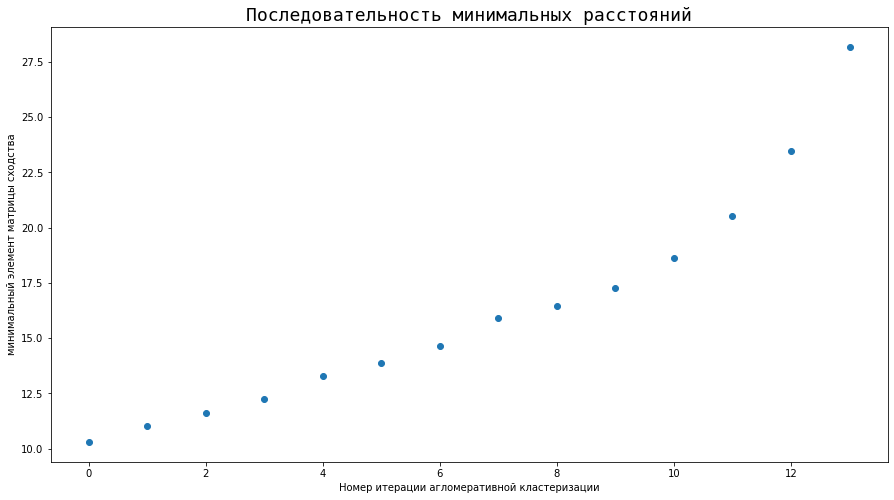

In [49]:
min_distances = np.array([10.3, 11.03, 11.61, 12.26, 13.29, 13.86, 14.63, 15.9, 16.47, 17.26, 18.62, 20.52, 23.46, 28.18])

plt.plot(min_distances, 'o')
plt.title('Последовательность минимальных расстояний', fontdict={'fontfamily':'monospace', 
                                                                 'fontsize':18})
plt.xlabel('Номер итерации агломеративной кластеризации')
plt.ylabel('минимальный элемент матрицы сходства')

In [50]:
data = pd.DataFrame({'i': np.arange(len(min_distances)),
                     'i^2': np.arange(len(min_distances))**2,
                     'y': min_distances})
data.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
i,0.0,1.00,2.00,3.00,4.00,5.00,6.00,7.0,8.00,9.00,10.00,11.00,12.00,13.00
i^2,0.0,1.00,4.00,9.00,16.00,25.00,36.00,49.0,64.00,81.00,100.00,121.00,144.00,169.00
y,10.3,11.03,11.61,12.26,13.29,13.86,14.63,15.9,16.47,17.26,18.62,20.52,23.46,28.18


## Аппроксимирующие функции

In [51]:
linear = lambda i, a, b: a * i + b
parabolic = lambda i, c, d: c * (i**2) + d

## Критерий

In [92]:
def markov_moment(number_of_points,
                  F):
    """
    Params:
      number_of_points: int, how many points would be used for approximation
      F: array, the min_distances
    """
    T = len(F)
    interval = np.arange(number_of_points)
    for i in range(T - number_of_points):
        approx_points = F[i:(i+number_of_points)]
        #print(i, approx_points)
        # transformation
        approx_points = approx_points - approx_points[0]
        # error for linear
        OLS_model = LinearRegression().fit(X=np.reshape(interval, (-1, 1)),
                                           y=approx_points)
        lin_coef = OLS_model.coef_[0], OLS_model.intercept_
        #print(lin_coef)
        lin_error = np.sum((linear(interval, lin_coef[0], lin_coef[1]) - approx_points)**2)
        #print('linear error =', lin_error)
        
        # error for parabolic
        OLS_model = LinearRegression().fit(X=np.reshape(interval**2, (-1, 1)),
                                           y=approx_points)
        quad_coef = OLS_model.coef_[0], OLS_model.intercept_
        #print(quad_coef)
        quad_error = np.sum((parabolic(interval, quad_coef[0], quad_coef[1]) - approx_points)**2)
        #print('quad error =', lin_error)
        
        # criterion
        if lin_error > quad_error:
            return i

In [93]:
markov_moment(3, min_distances)

5

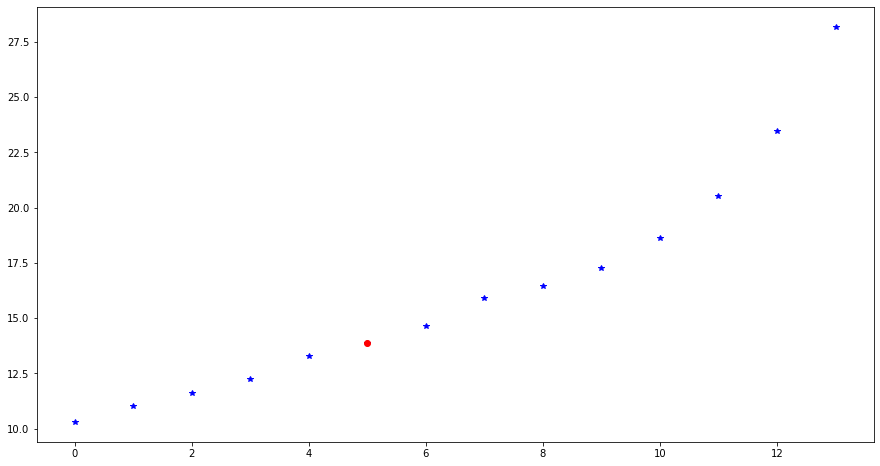

In [99]:
k = 3
stop_point = markov_moment(k, min_distances)

plt.plot(min_distances, '*b')
plt.plot(stop_point, min_distances[stop_point], 'or')

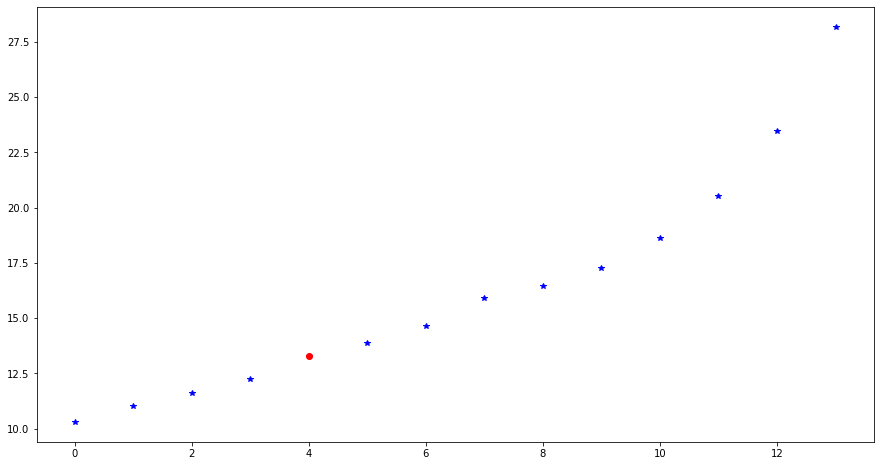

In [100]:
k = 4
stop_point = markov_moment(k, min_distances)

plt.plot(min_distances, '*b')
plt.plot(stop_point, min_distances[stop_point], 'or')